In [43]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import missingno as mno
from sklearn.impute import SimpleImputer

In [44]:
# set the date column as the index
# index column gives each row a unique identifier
weather = pd.read_csv("JFK Station.csv", index_col = "DATE")

In [45]:
weather

,STATION,NAME,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT21,WT22,WV01
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",80.0,90.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",30.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",80.0,100.0,NaN,NaN,NaN,0.02,0.0,0.0,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",30.0,10.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,10.74,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-28,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,8.50,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-29,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,7.16,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
weather.shape

(19358, 44)

In [47]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19358 entries, 1970-01-01 to 2022-12-31
Data columns (total 44 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  19358 non-null  object 
 1   NAME     19358 non-null  object 
 2   ACMH     9615 non-null   float64
 3   ACSH     9616 non-null   float64
 4   AWND     14242 non-null  float64
 5   FMTM     10124 non-null  float64
 6   PGTM     12269 non-null  float64
 7   PRCP     19358 non-null  float64
 8   SNOW     19358 non-null  float64
 9   SNWD     19357 non-null  float64
 10  TAVG     6235 non-null   float64
 11  TMAX     19358 non-null  int64  
 12  TMIN     19358 non-null  int64  
 13  TSUN     31 non-null     float64
 14  WDF1     9611 non-null   float64
 15  WDF2     9740 non-null   float64
 16  WDF5     9657 non-null   float64
 17  WDFG     5121 non-null   float64
 18  WDFM     1 non-null      float64
 19  WESD     6071 non-null   float64
 20  WSF1     9614 non-null   float64
 21  WSF

In [48]:
weather.describe()

,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT21,WT22,WV01
count,9615.000000,9616.000000,14242.000000,10124.000000,12269.000000,19358.000000,19358.000000,19357.000000,6235.000000,19358.000000,...,14.0,2185.0,887.0,42.0,6577.0,60.0,1167.0,5.0,49.0,1.0
mean,57.886635,60.665557,11.237993,1438.505828,1383.881245,0.117751,0.064433,0.208865,55.445389,61.786910,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,30.612050,33.353307,4.793856,758.281872,631.337736,0.330525,0.597869,1.270538,16.550058,17.402685,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
min,0.000000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,8.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,30.000000,30.000000,8.280000,1101.750000,1023.000000,0.000000,0.000000,0.000000,42.000000,48.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,60.000000,70.000000,10.510000,1526.000000,1458.000000,0.000000,0.000000,0.000000,56.000000,62.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,80.000000,90.000000,13.420000,1850.000000,1837.000000,0.040000,0.000000,0.000000,70.000000,77.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,100.000000,100.000000,308.030000,32767.000000,2359.000000,7.800000,30.300000,28.000000,91.000000,103.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [49]:
null_percentage=pd.DataFrame(weather[weather.columns[weather.isnull().any()]].isnull().sum()*100/weather.shape[0], columns =["Percentage of null values"])
null_percentage["Total NaN values"]=weather[weather.columns[weather.isnull().any()]].isnull().sum()

In [50]:
weather.shape[0]


19358

In [51]:
null_percentage

,Percentage of null values,Total NaN values
ACMH,50.330613,9743
ACSH,50.325447,9742
AWND,26.428350,5116
FMTM,47.701209,9234
PGTM,36.620519,7089
SNWD,0.005166,1
TAVG,67.791094,13123
TSUN,99.839859,19327
WDF1,50.351276,9747
WDF2,49.684885,9618


In [52]:
null_cols = null_percentage.index.tolist()
print(null_cols)

['ACMH', 'ACSH', 'AWND', 'FMTM', 'PGTM', 'SNWD', 'TAVG', 'TSUN', 'WDF1', 'WDF2', 'WDF5', 'WDFG', 'WDFM', 'WESD', 'WSF1', 'WSF2', 'WSF5', 'WSFG', 'WSFM', 'WT01', 'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT11', 'WT13', 'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT21', 'WT22', 'WV01']


<AxesSubplot:>

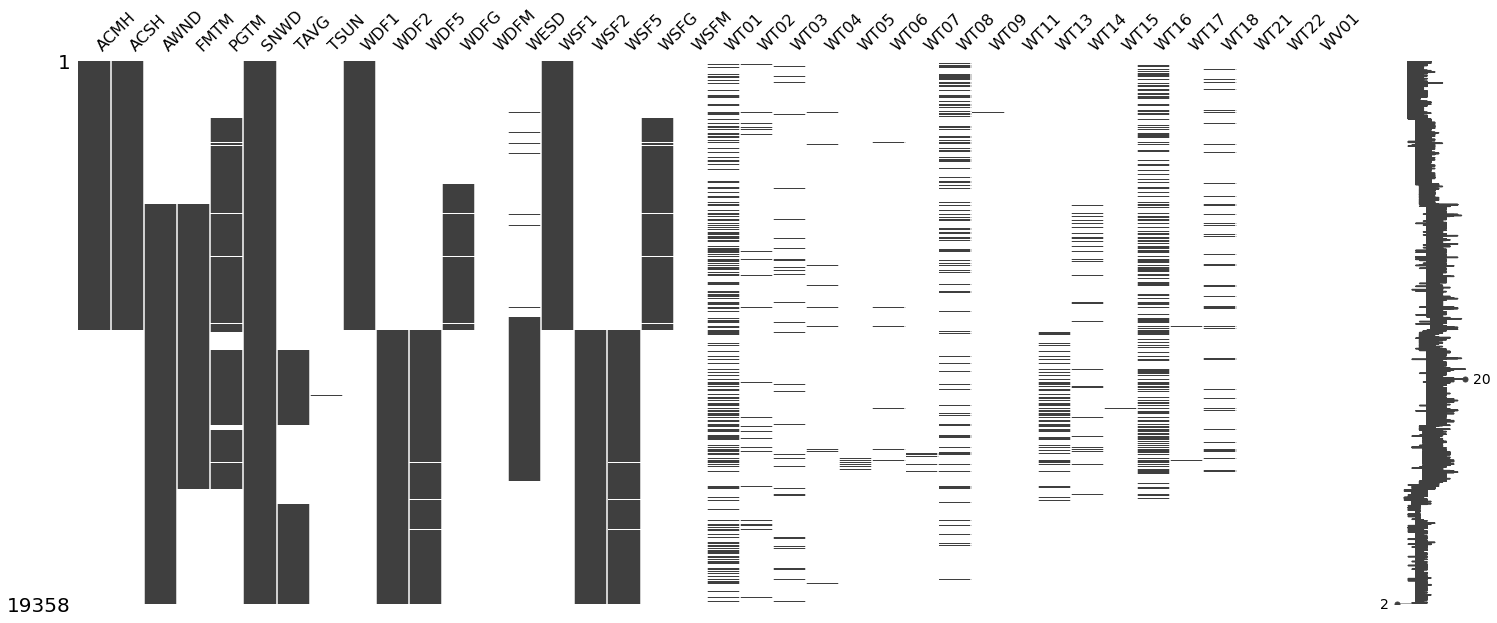

In [53]:
mno.matrix(weather[null_cols])

In [54]:
weatherdf = weather.copy()
weatherdf.columns = map(str.lower, weatherdf.columns)

In [55]:
weatherdf.head()

,station,name,acmh,acsh,awnd,fmtm,pgtm,prcp,snow,snwd,...,wt11,wt13,wt14,wt15,wt16,wt17,wt18,wt21,wt22,wv01
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",80.0,90.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",30.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",80.0,100.0,NaN,NaN,NaN,0.02,0.0,0.0,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",30.0,10.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
weatherdf.dtypes

station     object
name        object
acmh       float64
acsh       float64
awnd       float64
fmtm       float64
pgtm       float64
prcp       float64
snow       float64
snwd       float64
tavg       float64
tmax         int64
tmin         int64
tsun       float64
wdf1       float64
wdf2       float64
wdf5       float64
wdfg       float64
wdfm       float64
wesd       float64
wsf1       float64
wsf2       float64
wsf5       float64
wsfg       float64
wsfm       float64
wt01       float64
wt02       float64
wt03       float64
wt04       float64
wt05       float64
wt06       float64
wt07       float64
wt08       float64
wt09       float64
wt11       float64
wt13       float64
wt14       float64
wt15       float64
wt16       float64
wt17       float64
wt18       float64
wt21       float64
wt22       float64
wv01       float64
dtype: object

In [73]:
weatherdf.index = pd.to_datetime(weatherdf.index)
weatherdf.index

DatetimeIndex(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04',
               '1970-01-05', '1970-01-06', '1970-01-07', '1970-01-08',
               '1970-01-09', '1970-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', name='DATE', length=19358, freq=None)

In [79]:
# subset the years 
weatherdf.index.year

Int64Index([1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970,
            ...
            2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
           dtype='int64', name='DATE', length=19358)

In [80]:
# check whether columns have 9999s
weatherdf.apply(lambda x: (x==9999).sum())

station    0
name       0
acmh       0
acsh       0
awnd       0
fmtm       2
pgtm       0
prcp       0
snow       0
snwd       0
tavg       0
tmax       0
tmin       0
tsun       0
wdf1       0
wdf2       0
wdf5       0
wdfg       0
wdfm       0
wesd       0
wsf1       0
wsf2       0
wsf5       0
wsfg       0
wsfm       0
wt01       0
wt02       0
wt03       0
wt04       0
wt05       0
wt06       0
wt07       0
wt08       0
wt09       0
wt11       0
wt13       0
wt14       0
wt15       0
wt16       0
wt17       0
wt18       0
wt21       0
wt22       0
wv01       0
dtype: int64

In [82]:
for i in enumerate(weatherdf.columns):

(0, 'station')
(1, 'name')
(2, 'acmh')
(3, 'acsh')
(4, 'awnd')
(5, 'fmtm')
(6, 'pgtm')
(7, 'prcp')
(8, 'snow')
(9, 'snwd')
(10, 'tavg')
(11, 'tmax')
(12, 'tmin')
(13, 'tsun')
(14, 'wdf1')
(15, 'wdf2')
(16, 'wdf5')
(17, 'wdfg')
(18, 'wdfm')
(19, 'wesd')
(20, 'wsf1')
(21, 'wsf2')
(22, 'wsf5')
(23, 'wsfg')
(24, 'wsfm')
(25, 'wt01')
(26, 'wt02')
(27, 'wt03')
(28, 'wt04')
(29, 'wt05')
(30, 'wt06')
(31, 'wt07')
(32, 'wt08')
(33, 'wt09')
(34, 'wt11')
(35, 'wt13')
(36, 'wt14')
(37, 'wt15')
(38, 'wt16')
(39, 'wt17')
(40, 'wt18')
(41, 'wt21')
(42, 'wt22')
(43, 'wv01')


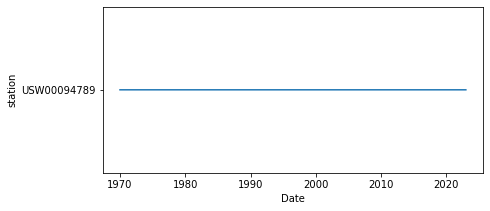

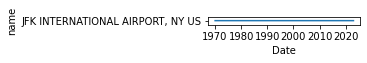

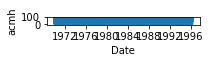

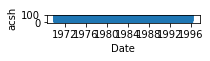

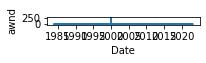

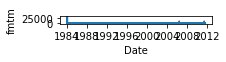

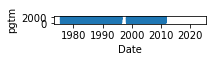

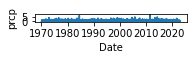

C:\Users\user\AppData\Local\Temp\ipykernel_3632\1834873319.py:7: RuntimeWarning: Second argument 'snow' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  plt.plot(weatherdf.index, i[1],data=weatherdf)


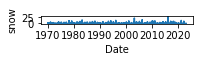

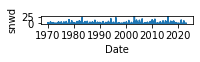

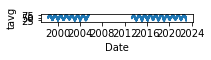

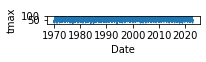

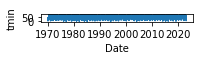

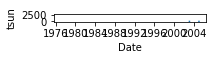

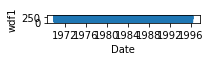

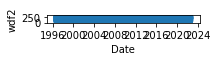

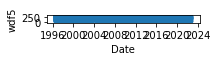

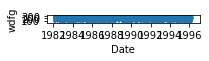

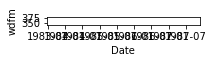

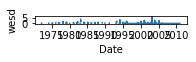

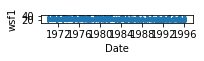

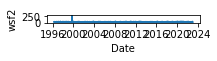

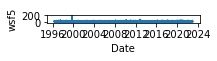

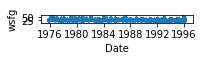

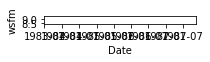

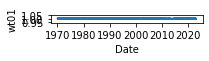

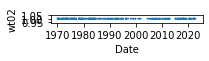

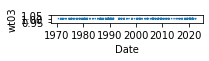

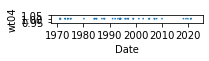

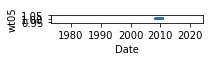

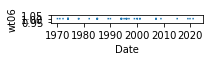

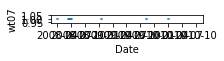

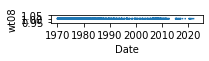

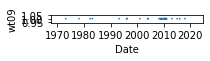

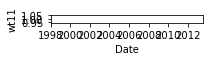

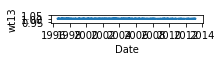

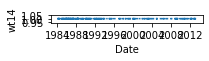

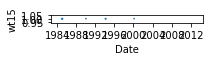

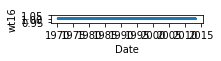

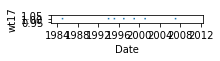

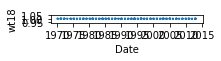

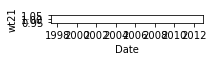

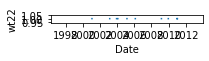

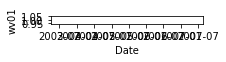

In [90]:
# for loop
plt.figure(figsize=(15,80))
for i in enumerate (weatherdf.columns):
    #     give the size of figplot
    plt.subplot(22,2,i[0]+1)
    # plot functionality
    plt.plot(weatherdf.index, i[1],data=weatherdf)
    plt.xlabel("Date")
    plt.ylabel(i[1])
    plt.show()

<AxesSubplot:>

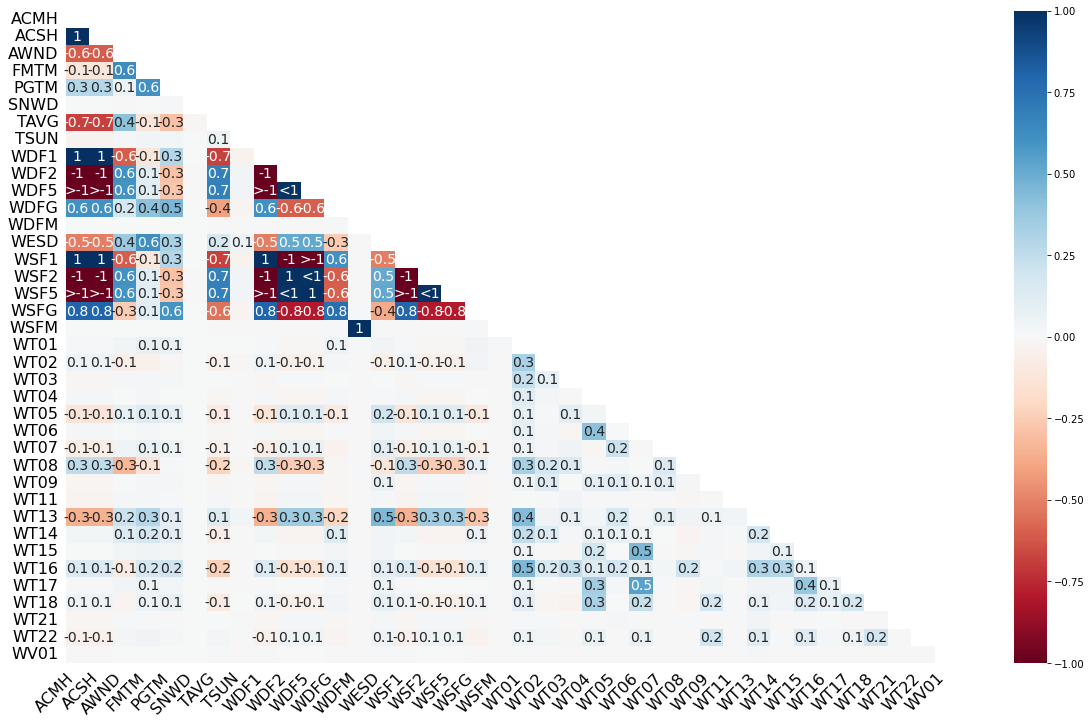

In [56]:
mno.heatmap(weather)

## POSITIVE CORRELATION 
* ACSH: ACMH
* WDF1 : ACMH, ACSH
* WDF5 : WDF2
* WSF1, ACMH, ACSH, WDF1
* WSF5, WDF2,WDF5, WSF2
* WSFM , WDFM
## NEGATIVE CORRELATION
* WDF2, WDF1, ACMH, ACSH
* WDF5 : WDF1, ACMH, ACSH
* WSF1: WDF2, WDF5
* WSF2: ACMH, ACSH , WDF1, WSF1
* WSF5: ACMH, ACSH, WDF1, WSF1

In [57]:
# columns with non-null values
non_null_columns = []
less_than5_columns = []
less_than25_columns = []
more_than25_columns = []
for column in weather.columns:
    if (weather[column].apply(pd.isnull).sum()/weather.shape[0])*100 == 0.0:
        non_null_columns.append(column)
    elif weather[column].apply(pd.isnull).sum()/weather.shape[0]*100 > 0.0 and weather[column].apply(pd.isnull).sum()/weather.shape[0]*100 <= 5.0 :
        less_than5_columns.append(column)
    elif weather[column].apply(pd.isnull).sum()/weather.shape[0]*100 > 5.0 and weather[column].apply(pd.isnull).sum()/weather.shape[0]*100 <= 25.0:
        less_than25_columns.append(column)
    elif (weather[column].apply(pd.isnull).sum()/weather.shape[0])*100 > 25.0:
        more_than25_columns.append(column)
print(len(non_null_columns))
print(non_null_columns)
print(len(less_than5_columns))
print(less_than5_columns)
print(len(less_than25_columns))
print(less_than25_columns)
print(len(more_than25_columns))
print(more_than25_columns)

6
['STATION', 'NAME', 'PRCP', 'SNOW', 'TMAX', 'TMIN']
1
['SNWD']
0
[]
37
['ACMH', 'ACSH', 'AWND', 'FMTM', 'PGTM', 'TAVG', 'TSUN', 'WDF1', 'WDF2', 'WDF5', 'WDFG', 'WDFM', 'WESD', 'WSF1', 'WSF2', 'WSF5', 'WSFG', 'WSFM', 'WT01', 'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT11', 'WT13', 'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT21', 'WT22', 'WV01']


## HANDLING MISSING VALUES FOR COLUMN WITH DATA MISSING LESS THAN 5% 

In [58]:
weather.columns.get_loc("SNWD")

9

In [59]:
df=weather.copy()

In [60]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean()>0]
cols
# df.dropna(subset=['STATION','SNWD'])

['SNWD']

In [61]:
df_new = df.dropna(subset=['STATION','SNWD'])

In [62]:
print(len(df_new)/len(df)*100)

99.99483417708441


In [63]:
# if we do cca on the missing data, we only lose 0.005 % of the data

In [64]:
df_new.shape

(19357, 44)

In [65]:
null_perc=pd.DataFrame(df_new[df_new.columns[df_new.isnull().any()]].isnull().sum()*100/df_new.shape[0], columns =["Percentage of null values"])
null_perc["Total NaN values"]=df_new[df_new.columns[df_new.isnull().any()]].isnull().sum()

In [66]:
null_perc

,Percentage of null values,Total NaN values
ACMH,50.328047,9742
ACSH,50.322881,9741
AWND,26.429715,5116
FMTM,47.698507,9233
PGTM,36.617244,7088
TAVG,67.794596,13123
TSUN,99.839851,19326
WDF1,50.348711,9746
WDF2,49.687452,9618
WDF5,50.116237,9701


# MEAN/MEDIAN IMPUTATION

In [67]:
mean_impute = weather.copy()